In [250]:
import pandas as pd
import numpy as np
import xlrd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
%matplotlib inline

In [252]:
df = pd.read_csv('credit.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [254]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [255]:
#converting string to integer
#default means that whether the loan applicant was unable to meet the agreed payment terms and went into default. 
#A total of 30 percent of the loans went into default that means 1 is bad and 0 is good number. 
#Bank wants to increase 0 and not 1.

df['default'].replace('yes', 1,inplace=True)
df['default'].replace('no', 0,inplace=True)
df['phone'].replace('yes', 1,inplace=True)
df['phone'].replace('no', 0,inplace=True)


In [256]:
df['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [257]:
df.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

In [258]:
# Initial Data Exploration

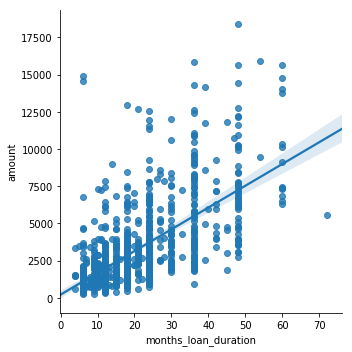

In [259]:
plt.figure(figsize=(10,6))
sns.lmplot('months_loan_duration','amount', df)

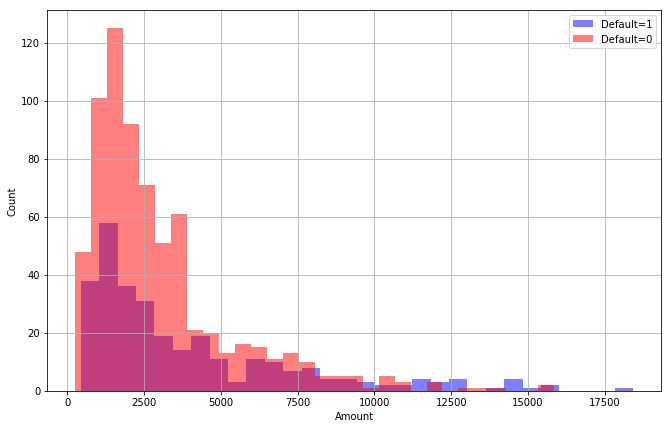

In [260]:
plt.figure(figsize=(11,7))
df[df['default']==1]['amount'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Default=1')
df[df['default']==0]['amount'].hist(alpha=0.5,color='red',
                                              bins=30,label='Default=0')
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Count')
#this shows that most of the people who borrow less are the defaulters.

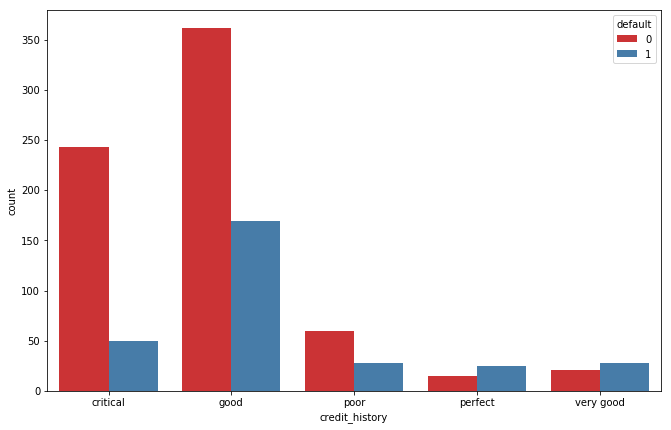

In [261]:
plt.figure(figsize=(11,7))
sns.countplot(x='credit_history',hue='default',data=df,palette='Set1')
#this gives the better undersyamding of where are the maximum defaulters
#most of the defaulters come from the "good" and "critical" credit history.

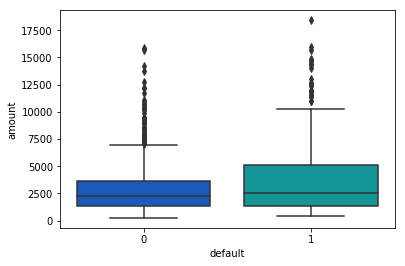

In [262]:
sns.boxplot(x='default',y='amount',data=df,palette='winter')

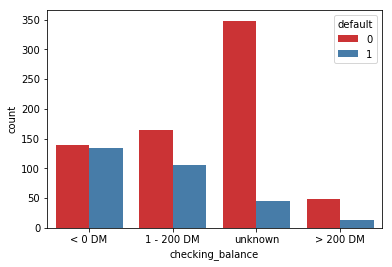

In [263]:
sns.countplot(x='checking_balance',hue='default',data=df,palette='Set1')

<function seaborn.axisgrid.pairplot>

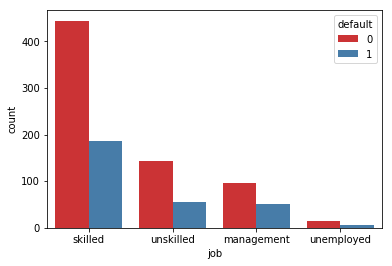

In [264]:
sns.countplot(x='job',hue='default',data=df,palette='Set1')
sns.pairplot

In [265]:
df['years_at_residence'].value_counts(dropna = False)

4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64

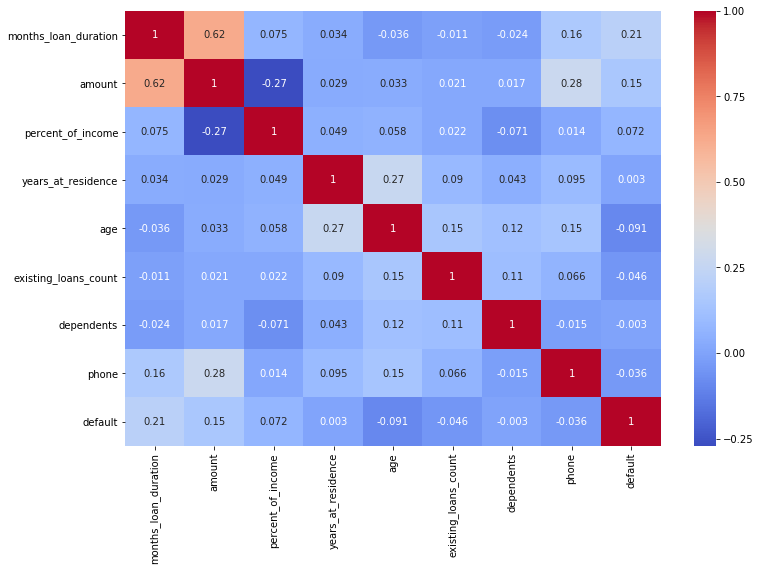

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)

In [267]:
cat_cb1 = ['savings_balance','checking_balance','months_loan_duration','credit_history','purpose','employment_duration',
          'other_credit','housing','job']

In [268]:
df2 = pd.get_dummies(df,columns=cat_cb1,drop_first=True)

In [269]:
df2.head()

,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,...,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled
0,1169,4,4,67,2,1,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
1,5951,2,2,22,1,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,2096,2,3,49,1,2,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,7882,2,4,45,1,2,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,4870,3,4,53,2,2,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [270]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
amount                             1000 non-null int64
percent_of_income                  1000 non-null int64
years_at_residence                 1000 non-null int64
age                                1000 non-null int64
existing_loans_count               1000 non-null int64
dependents                         1000 non-null int64
phone                              1000 non-null int64
default                            1000 non-null int64
savings_balance_500 - 1000 DM      1000 non-null uint8
savings_balance_< 100 DM           1000 non-null uint8
savings_balance_> 1000 DM          1000 non-null uint8
savings_balance_unknown            1000 non-null uint8
checking_balance_< 0 DM            1000 non-null uint8
checking_balance_> 200 DM          1000 non-null uint8
checking_balance_unknown           1000 non-null uint8
months_loan_duration_5             1000 non-null uint8
months_loan_du

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
X1 = df2.drop(['default'],axis=1)
y1 = df2['default']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)


In [273]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 66 columns):
amount                             1000 non-null int64
percent_of_income                  1000 non-null int64
years_at_residence                 1000 non-null int64
age                                1000 non-null int64
existing_loans_count               1000 non-null int64
dependents                         1000 non-null int64
phone                              1000 non-null int64
savings_balance_500 - 1000 DM      1000 non-null uint8
savings_balance_< 100 DM           1000 non-null uint8
savings_balance_> 1000 DM          1000 non-null uint8
savings_balance_unknown            1000 non-null uint8
checking_balance_< 0 DM            1000 non-null uint8
checking_balance_> 200 DM          1000 non-null uint8
checking_balance_unknown           1000 non-null uint8
months_loan_duration_5             1000 non-null uint8
months_loan_duration_6             1000 non-null uint8
months_loan_du

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
dtree1 = DecisionTreeClassifier()

In [276]:
dtree1.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [277]:
predictions1 = dtree1.predict(X1_test)

In [278]:
from sklearn.metrics import classification_report,confusion_matrix

In [279]:
print(classification_report(y1_test,predictions1))
print('/')
print(confusion_matrix(y1_test,predictions1))

             precision    recall  f1-score   support

          0       0.74      0.76      0.75       204
          1       0.47      0.44      0.45        96

avg / total       0.65      0.66      0.66       300

/
[[156  48]
 [ 54  42]]


In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rfc1 = RandomForestClassifier(n_estimators=6)

In [282]:
rfc1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [283]:
rfc1_predictions1 = rfc1.predict(X1_test)

In [284]:
print(classification_report(y1_test,rfc1_predictions1))
print('/')
print(confusion_matrix(y1_test,rfc1_predictions1))

             precision    recall  f1-score   support

          0       0.73      0.91      0.81       204
          1       0.58      0.27      0.37        96

avg / total       0.68      0.70      0.67       300

/
[[185  19]
 [ 70  26]]


In [285]:
rfc1.n_estimators

6

In [286]:
from sklearn.grid_search import GridSearchCV

In [287]:
from sklearn.metrics import roc_auc_score

In [288]:
param_grid = {'n_estimators': [10, 50, 100, 150, 200, 300, 400]}


In [289]:
grid1 = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose = 3)
grid1.fit(X1_train, y1_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_estimators=10 .................................................
[CV] ........................ n_estimators=10, score=0.726496 -   0.0s
[CV] n_estimators=10 .................................................
[CV] ........................ n_estimators=10, score=0.721030 -   0.0s
[CV] n_estimators=10 .................................................
[CV] ........................ n_estimators=10, score=0.759657 -   0.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ n_estimators=50, score=0.726496 -   0.1s
[CV] n_estimators=50 .................................................
[CV] ........................ n_estimators=50, score=0.708155 -   0.0s
[CV] n_estimators=50 .................................................
[CV] ........................ n_estimators=50, score=0.751073 -   0.0s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.743590 -   0.1s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.742489 -   0.1s
[CV] n_estimators=100 ................................................
[CV] ....................... n_estimators=100, score=0.763948 -   0.1s
[CV] n_estimators=150 ................................................
[CV] ....................... n_estimators=150, score=0.743590 -   0.2s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [290]:
grid1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [291]:
grid1.best_params_

{'n_estimators': 100}

In [292]:
grid_rfc1_prediction = grid1.predict(X1_test)
print(classification_report(y1_test,grid_rfc1_prediction))
print('/')
print(confusion_matrix(y1_test,grid_rfc1_prediction))

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       204
          1       0.72      0.27      0.39        96

avg / total       0.73      0.73      0.69       300

/
[[194  10]
 [ 70  26]]


In [293]:
# We can clearly see that the F1-score got increased from decision tree to Random forest and then Grid Search Cross Validaiton
# Decision Tree = 0.66
# Random Forest = 0.67
# Grid Search CV = 0.69